# Model Development for Sentiment Analysis

In this notebook, we will cover the model training and evaluation process for our sentiment analysis application. We will:
- Load the preprocessed data
- Split the data into training and testing sets
- Select a machine learning algorithm
- Train the model
- Evaluate the model's performance


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the preprocessed data
data = pd.read_csv('../data/processed/processed_data.csv')

# Display the first few rows of the data
data.head()

,cleaned_text,sentiment,text_length
0,white house point man homeland security shared...,0,88
1,luigi mangione pleads fans stop sending many p...,1,51
2,trump posts deranged ai video vision trump gaza,0,47
3,lying james comer threatens sgt arms forcibly ...,1,86
4,gop wants musk starlink get cut billion biden ...,1,59


In [2]:
# Split the data into features and labels
X = data['cleaned_text']
y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [3]:
# Train the model
model = LogisticRegression(class_weight='balanced')




In [4]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_vectorized, y_train, cv=5)  # 5-fold cross-validation
model.fit(X_train_vectorized, y_train)

LogisticRegression(class_weight='balanced')

In [5]:
# Make predictions
y_pred = model.predict(X_test_vectorized)


In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       119
           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       393

    accuracy                           1.00       785
   macro avg       1.00      1.00      1.00       785
weighted avg       1.00      1.00      1.00       785



## Save the trained model
We will save the trained model for later use in the Streamlit application.


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       119
           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       393

    accuracy                           1.00       785
   macro avg       1.00      1.00      1.00       785
weighted avg       1.00      1.00      1.00       785



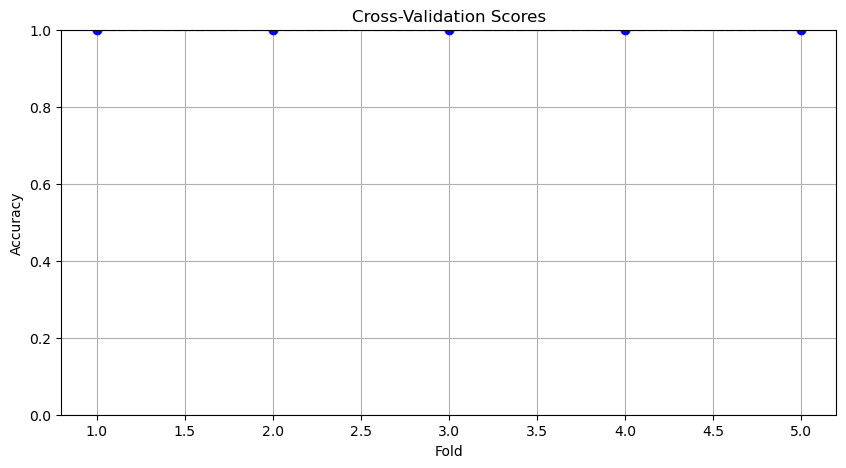

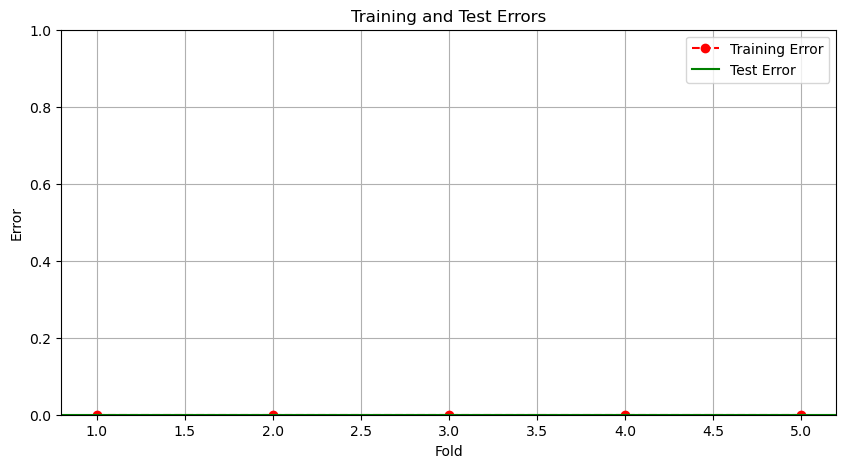

In [7]:
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Plot cross-validation scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Calculate training and test errors
train_errors = 1 - cross_val_score(model, X_train_vectorized, y_train, cv=5)
test_errors = 1 - accuracy_score(y_test, y_pred)

# Plot training and test errors
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), train_errors, marker='o', linestyle='--', color='r', label='Training Error')
plt.axhline(y=test_errors, color='g', linestyle='-', label='Test Error')
plt.title('Training and Test Errors')
plt.xlabel('Fold')
plt.ylabel('Error')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import joblib
joblib.dump(model, "models/trained_model.pkl")
joblib.dump(vectorizer, "models/vectorizer.pkl")  # Save vectorizer too


['models/vectorizer.pkl']

In [9]:
import joblib

# Save trained model
joblib.dump(model, "models/trained_model.pkl")
print("Model saved successfully!")

# Save the vectorizer
joblib.dump(vectorizer, "models/vectorizer.pkl")
print("Vectorizer saved successfully!")


Model saved successfully!
Vectorizer saved successfully!


In [10]:
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs("c:/Users/ankit/Desktop/LORU/sentiment-analysis-app/streamlit_app/models", exist_ok=True)

# Assuming you have a trained model and vectorizer
joblib.dump(model, "c:/Users/ankit/Desktop/LORU/sentiment-analysis-app/streamlit_app/models/trained_model.pkl")
joblib.dump(vectorizer, "c:/Users/ankit/Desktop/LORU/sentiment-analysis-app/streamlit_app/models/vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")

✅ Model and vectorizer saved successfully!
